# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [107]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a merged DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the merged data in table format
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [108]:
# Checking the number of mice

# Calculate the number of mice in the new data set
number_mice = merged_df['Mouse ID'].nunique()

#print unique number
print("Number of unique mice:", number_mice)

Number of unique mice: 249


In [109]:
# refereshed my knowledge using the groupby function by revisiting the following inclass activity
# University of Adelaide. (2023). plotting_groups_solution.ipynb. https://git.bootcampcontent.com/University-of-Adelaide/UADEL-VIRT-DATA-PT-12-2023-U-LOLC/-/blob/main/05-Data-Visualisation/2/Activities/04-Ins_GroupPlots/Solved/plotting_groups_solution.ipynb?ref_type=heads

# Grouped'Mouse ID' and 'Timepoint' to filter for if the result is greater than 1 by utilising lambda function learnt in tutor session in previous week
duplicate_mouseID_timepoint = merged_df.groupby(['Mouse ID', 'Timepoint']).filter(lambda x: len(x) > 1)

# Unique mouse IDs with duplicate time points
duplicates = duplicate_mouseID_timepoint['Mouse ID'].unique()

# Mouse IDs with duplicate time points 
for mouse_id in duplicates:
    print(f"Duplicated Mouse ID in data set '{mouse_id}':")
    duplicate_mouseID_timepoint[duplicate_mouseID_timepoint['Mouse ID'] == mouse_id]


Duplicated Mouse ID in data set 'g989':


In [110]:
# Optional: Get all the data for the duplicate mouse ID. Showed all g989 data in the table below
duplicate_mouseID_timepoint[duplicate_mouseID_timepoint['Mouse ID'] == mouse_id]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [111]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

# Summarise clean DataFrame
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [112]:
# Checking the number of mice in the clean DataFrame.
number_mice_clean = clean_df['Mouse ID'].nunique()

#print the result
number_mice_clean

249

## Summary Statistics

In [113]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#Summary table as per parameters of the question into a single dataframe
# followed the logic of groupby following the below inclass activity and debugged with chatGPT
# University of Adelaide. (2023). plotting_groups_solution.ipynb. https://git.bootcampcontent.com/University-of-Adelaide/UADEL-VIRT-DATA-PT-12-2023-U-LOLC/-/blob/main/05-Data-Visualisation/2/Activities/04-Ins_GroupPlots/Solved/plotting_groups_solution.ipynb?ref_type=heads
#OpenAI. (2023). ChatGPT [Language model]. https://openai.com/chatgpt
summary_statistics_df = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Renamed columns as per the module instructions
summary_statistics_df = summary_statistics_df.rename(columns={'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume', 'var': 'Tumor Volume Variance', 'std': 'Tumor Volume Std. Dev.', 'sem': 'Tumor Volume Std. Err.'})

# Display the summary statistics table
summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

#please refer to previous code ^

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

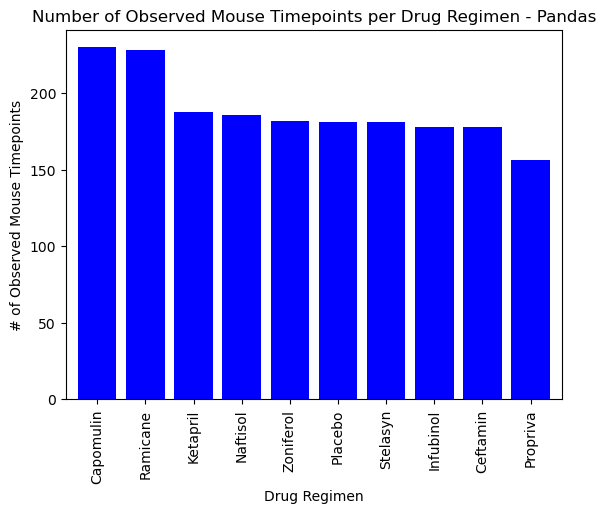

In [114]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#leveraged inclass activities
#University of Adelaide. (2023). Ins_BarCharts. https://git.bootcampcontent.com/University-of-Adelaide/UADEL-VIRT-DATA-PT-12-2023-U-LOLC/-/tree/main/05-Data-Visualisation/1/Activities/07-Ins_BarCharts?ref_type=heads
#University of Adelaide. (2023). Stu_PyBars. https://git.bootcampcontent.com/University-of-Adelaide/UADEL-VIRT-DATA-PT-12-2023-U-LOLC/-/tree/main/05-Data-Visualisation/1/Activities/08-Stu_PyBars?ref_type=heads
bar_plot_pandas = clean_df['Drug Regimen'].value_counts()

# Plotting the bar chart using pandas and formating color and width
bar_plot_pandas.plot(kind='bar', color='blue', width = 0.8)

# Labels and title to present the data in a more meaningful, clean format
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Number of Observed Mouse Timepoints per Drug Regimen - Pandas')


# Displaying the plot
plt.show()

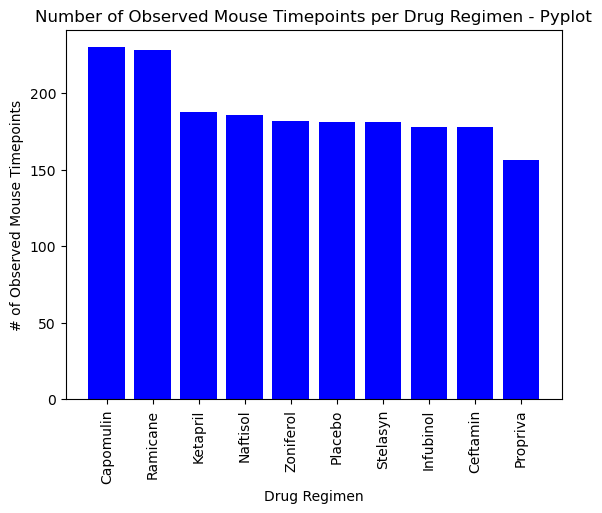

In [115]:
#leveraged inclass activities
#University of Adelaide. (2023). Ins_BarCharts. https://git.bootcampcontent.com/University-of-Adelaide/UADEL-VIRT-DATA-PT-12-2023-U-LOLC/-/tree/main/05-Data-Visualisation/1/Activities/07-Ins_BarCharts?ref_type=heads
#University of Adelaide. (2023). Stu_PyBars. https://git.bootcampcontent.com/University-of-Adelaide/UADEL-VIRT-DATA-PT-12-2023-U-LOLC/-/tree/main/05-Data-Visualisation/1/Activities/08-Stu_PyBars?ref_type=heads

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_plot_pyplot = clean_df['Drug Regimen'].value_counts()

# Extracting data for plotting
drug_regimens = bar_plot_pyplot.index
observed_timepoints = bar_plot_pyplot.values

# Plotting the bar chart including changing color and width
plt.bar(drug_regimens, observed_timepoints, color='blue', width=0.8)  

# Labels and title to present the data in a more meaningful, clean format
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Number of Observed Mouse Timepoints per Drug Regimen - Pyplot')


# Displaying the plot
plt.xticks(rotation=90) #rotated labels to prevent overlap
plt.show()

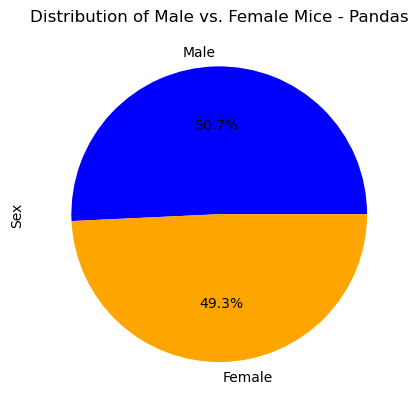

In [42]:
#leveraged inclass activities
# University of Adelaide. (2023). Ins_PieCharts. https://git.bootcampcontent.com/University-of-Adelaide/UADEL-VIRT-DATA-PT-12-2023-U-LOLC/-/tree/main/05-Data-Visualisation/1/Activities/09-Ins_PieCharts/Solved?ref_type=heads
#University of Adelaide. (2023). Stu_PyPies. https://git.bootcampcontent.com/University-of-Adelaide/UADEL-VIRT-DATA-PT-12-2023-U-LOLC/-/tree/main/05-Data-Visualisation/1/Activities/10-Stu_PyPies?ref_type=heads

# Pie plot showing the distribution of female versus male mice using Pandas
pie_plot_pandas = clean_df['Sex'].value_counts()

# Plotting the pie chart using pandas
pie_plot_pandas.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'], startangle=360)

# Labels and title
plt.title('Distribution of Male vs. Female Mice - Pandas')

# Displaying the plot
plt.show()

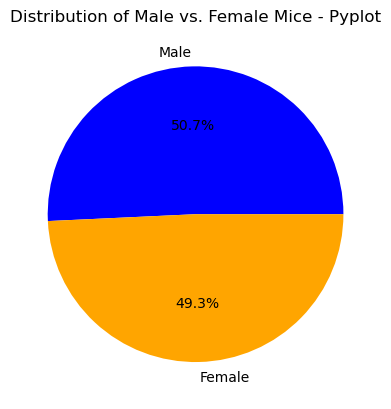

In [116]:
#leveraged inclass activities
# University of Adelaide. (2023). Ins_PieCharts. https://git.bootcampcontent.com/University-of-Adelaide/UADEL-VIRT-DATA-PT-12-2023-U-LOLC/-/tree/main/05-Data-Visualisation/1/Activities/09-Ins_PieCharts/Solved?ref_type=heads
#University of Adelaide. (2023). Stu_PyPies. https://git.bootcampcontent.com/University-of-Adelaide/UADEL-VIRT-DATA-PT-12-2023-U-LOLC/-/tree/main/05-Data-Visualisation/1/Activities/10-Stu_PyPies?ref_type=heads

# Pie plot showing the distribution of female versus male mice using pyplot
pie_plot_pyplot = clean_df['Sex'].value_counts()

# Plotting the pie chart using pyplot
plt.pie(pie_plot_pyplot, labels=pie_plot_pyplot.index, autopct='%1.1f%%', colors=['blue', 'orange'], startangle=360)

# Title
plt.title('Distribution of Male vs. Female Mice - Pyplot')

# Displaying the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [117]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# leverage code from inclass activity
# University of Adelaide. (2023). Ins_Quartiles_and_Outliers. https://git.bootcampcontent.com/University-of-Adelaide/UADEL-VIRT-DATA-PT-12-2023-U-LOLC/-/tree/main/05-Data-Visualisation/3/Activities/02-Ins_Quartiles_and_Outliers?ref_type=heads

# Refined to the desired drug regirmens Capomulin, Ramicane, Infubinol, and Ceftamin and created new dataframe
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = clean_df[clean_df['Drug Regimen'].isin(treatment_regimens)]

# Last (greatest) timepoint for each mouse
last_timepoints = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge of last timepoints df with the cleana df
last_tumor_volumes = pd.merge(last_timepoints, clean_df, on=['Mouse ID', 'Timepoint'], how='left')
last_tumor_volumes


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [118]:
# leverage code from inclass activity
# University of Adelaide. (2023). Ins_Quartiles_and_Outliers. https://git.bootcampcontent.com/University-of-Adelaide/UADEL-VIRT-DATA-PT-12-2023-U-LOLC/-/tree/main/05-Data-Visualisation/3/Activities/02-Ins_Quartiles_and_Outliers?ref_type=heads
#debugged the reset_index function with the assistance of ChatGPT
#OpenAI. (2023). ChatGPT [Language model]. https://openai.com/chatgpt

# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in treatment_regimens:
    filtered_df = clean_df[clean_df['Drug Regimen'] == regimen]
    last_timepoints = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    last_tumor_volumes = pd.merge(last_timepoints, clean_df, on=['Mouse ID', 'Timepoint'], how='left')
   
    
    #revisisted inclass outlier activity to ensure I was calculating outliers correctly
    #University of Adelaide. (2023). Summary Statistics Python. https://git.bootcampcontent.com/University-of-Adelaide/UADEL-VIRT-DATA-PT-12-2023-U-LOLC/-/tree/main/05-Data-Visualisation/3/Activities/03-Stu_Summary_Stats_Python?ref_type=heads
    # Determine outliers using upper and lower bounds
    quartiles = last_tumor_volumes['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine outlier bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Identify potential outliers
    potential_outliers = last_tumor_volumes[(last_tumor_volumes['Tumor Volume (mm3)'] < lower_bound) |
                                             (last_tumor_volumes['Tumor Volume (mm3)'] > upper_bound)]
    
     # Append tumor volume data for the current regimen to the list
    tumor_vol_data.append({
        'Regimen': regimen,
        'Potential Outliers': potential_outliers['Tumor Volume (mm3)'].values
    })

# Print potential outliers for each treatment
for data in tumor_vol_data:
    print(f"{data['Regimen']}'s potential outliers: {data['Potential Outliers']}")
    

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


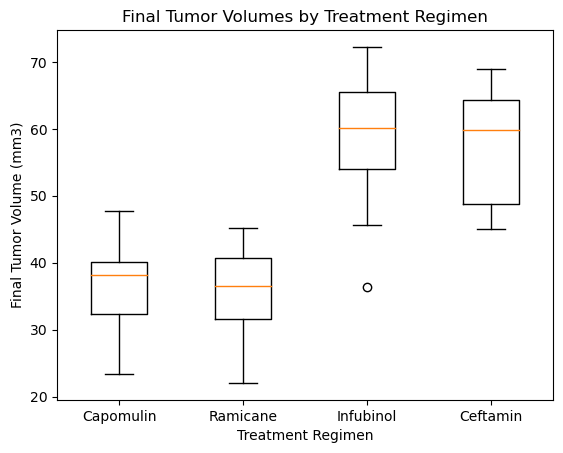

In [119]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# List of treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#  Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Iterate through each treatment regimen
for regimen in treatment_regimens:
    # Filter the DataFrame for the current treatment regimen
    filtered_df = clean_df[clean_df['Drug Regimen'] == regimen]
    
    # Get the last (greatest) timepoint for each mouse
    last_timepoints = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
    
    # Merge this DataFrame with the original DataFrame to get the tumor volume at the last timepoint
    last_tumor_volumes = pd.merge(last_timepoints, clean_df, on=['Mouse ID', 'Timepoint'], how='left')
    
    # Append tumor volume data for the current regimen to the list
    #debugged the append function with the assistance of ChatGPT
    #OpenAI. (2023). ChatGPT [Language model]. https://openai.com/chatgpt
    tumor_vol_data.append(last_tumor_volumes['Tumor Volume (mm3)'].tolist())

# displayed results of tumor volume data by treatment regimens using boxplot visualisation
plt.boxplot(tumor_vol_data, labels=treatment_regimens)
plt.title('Final Tumor Volumes by Treatment Regimen')
plt.xlabel('Treatment Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

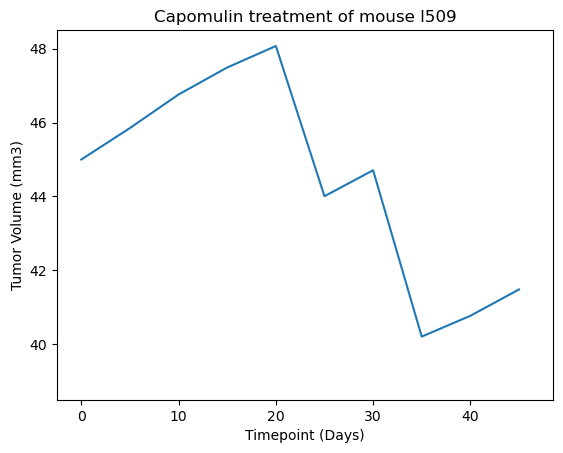

In [120]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
filtered_df_line = clean_df[(clean_df['Mouse ID'] == 'l509') & (clean_df['Drug Regimen'] == 'Capomulin')]

# Plot tumor volume (mm3) on the y-axis and timepoint (days) on the x-axis
plt.plot(filtered_df_line['Timepoint'], filtered_df_line['Tumor Volume (mm3)'], linestyle='-')

#  Formatted graph to match instructions
# Set the y-axis range
plt.ylim(38.5, 48.5) 
# Set the x-axis range
plt.xlim(-2.5, 48.5)  
# Axes and titles
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')

# Display the plot
plt.show()

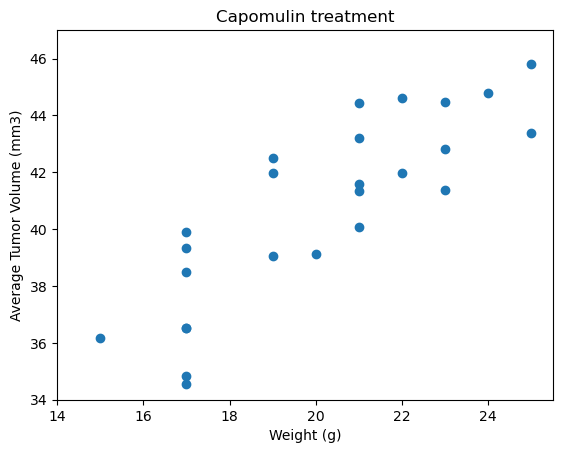

In [121]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# leveraged code from incalss activity referenced below to create scatterplot (plt.scatter)
# University of Adelaide. (2023). Summary Statistics Python. https://git.bootcampcontent.com/University-of-Adelaide/UADEL-VIRT-DATA-PT-12-2023-U-LOLC/-/tree/main/05-Data-Visualisation/3/Activities/03-Stu_Summary_Stats_Python?ref_type=heads

# Create a new dataframe for the scatterplot using just data for Capomulin drug regimen
filtered_df_scatter = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = filtered_df_scatter.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the weight for each mouse
mouse_weight = filtered_df_scatter.groupby('Mouse ID')['Weight (g)'].mean()

# Plot scatter plot of average tumor volume (mm3) vs. weight (g)
plt.scatter(mouse_weight, average_tumor_volume, marker='o')

# formatted graph to match instructions
# y-axis range
plt.ylim(34, 47)
# x-axis range
plt.xlim(14, 25.5)   
# Axes and titles
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin treatment')


# Display the scatter plot
plt.show()

## Correlation and Regression

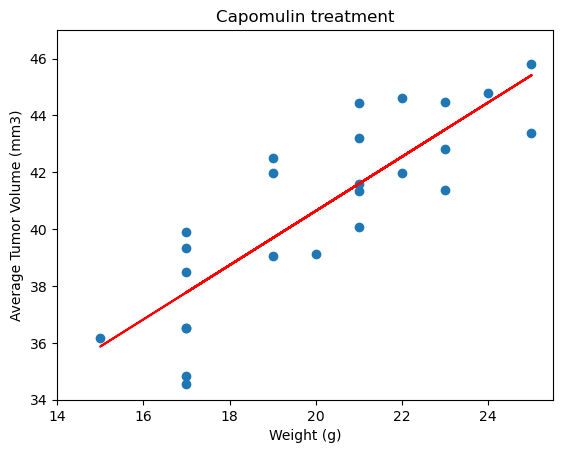

The correlation between mouse weight and the average tumor volume is 0.84


In [122]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#Correlation and Regression code is leveraged from Scatterplot code

filtered_df_scatter = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = filtered_df_scatter.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding weight for each mouse
mouse_weight = filtered_df_scatter.groupby('Mouse ID')['Weight (g)'].mean()

# Plot scatter plot of average tumor volume (mm3) vs. weight (g)
plt.scatter(mouse_weight, average_tumor_volume, marker='o')

# formatted graph to match instructions
# y-axis range
plt.ylim(34, 47)
# x-axis range
plt.xlim(14, 25.5)
#Axes and titles
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin treatment')

# Linear regression line plot and r value leveraged from inclass activity referenced below
# University of Adelaide. (2023). Fits and Regression. https://git.bootcampcontent.com/University-of-Adelaide/UADEL-VIRT-DATA-PT-12-2023-U-LOLC/-/tree/main/05-Data-Visualisation/3/Activities/08-Ins_Fits_and_Regression?ref_type=heads
x_values = mouse_weight
y_values = average_tumor_volume
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
plt.plot(x_values, regress_values, "r-")

# Display the scatter plot with linear regression line and correlation
plt.show()
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue, 2)}")
